In [226]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [202]:
# Carga del dataset
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [203]:
# Elimina la columna id
houses = houses.drop('Id',axis=1)
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [204]:
# Revisión del tamaño del dataset
houses.shape

(1460, 80)

In [205]:
# Detalle de las columnas
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Revisión de nulos

In [206]:
# Asigna los valores a un diccionario
nulos = houses.isnull().sum().to_dict()

# Filtra sólo las variables que tienen nulos
dict(filter(lambda x: x[1] > 0, nulos.items()))

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [207]:
# Elimina las columnas con mayor número de nulos
houses = houses.drop(['MiscFeature','PoolQC','Alley','Fence'], axis=1)

In [208]:
# Verifica que ya no estén las columnas eliminadas 
houses.shape

(1460, 76)

In [209]:
# Lotfrontage debería ser cero, no Na.
houses = houses.fillna({'LotFrontage':0})

In [210]:
# MasVnrType puede ser None si MasVnrArea es cero
houses[houses['MasVnrType'].isnull()]['MasVnrArea']

#Como son NaN, se corrige MasVnrArea
houses = houses.fillna({'MasVnrArea':0})

In [211]:
# Revisando el detalle, es correcto que 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', si TotalBsmtSF es cero
houses[houses['BsmtQual'].isnull()]['TotalBsmtSF'].value_counts()

0    37
Name: TotalBsmtSF, dtype: int64

In [212]:
# El nulo en eléctrico sí se elimina, ya que no es posible tener todos los servicios en Utilities y no un servicio electrico determinado.
houses = houses.drop(index = houses[houses['Electrical'].isnull()].index[0], axis=0)

In [213]:
# Validar que Fireplaces sea 0 para todos los FireplaceQu nulos, si sí también se pueden quedar.
houses[houses['FireplaceQu'].isnull()]['Fireplaces'].value_counts()

0    689
Name: Fireplaces, dtype: int64

In [214]:
# es correcto que 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond', si GarageCars y 
# GarageArea son cero.
houses[houses['GarageType'].isnull()]['GarageArea'].value_counts()

0    81
Name: GarageArea, dtype: int64

In [215]:
# Reseteo de index en la base limpia
houses = houses.reset_index(drop=True)

Tratamiento de datos atípicos

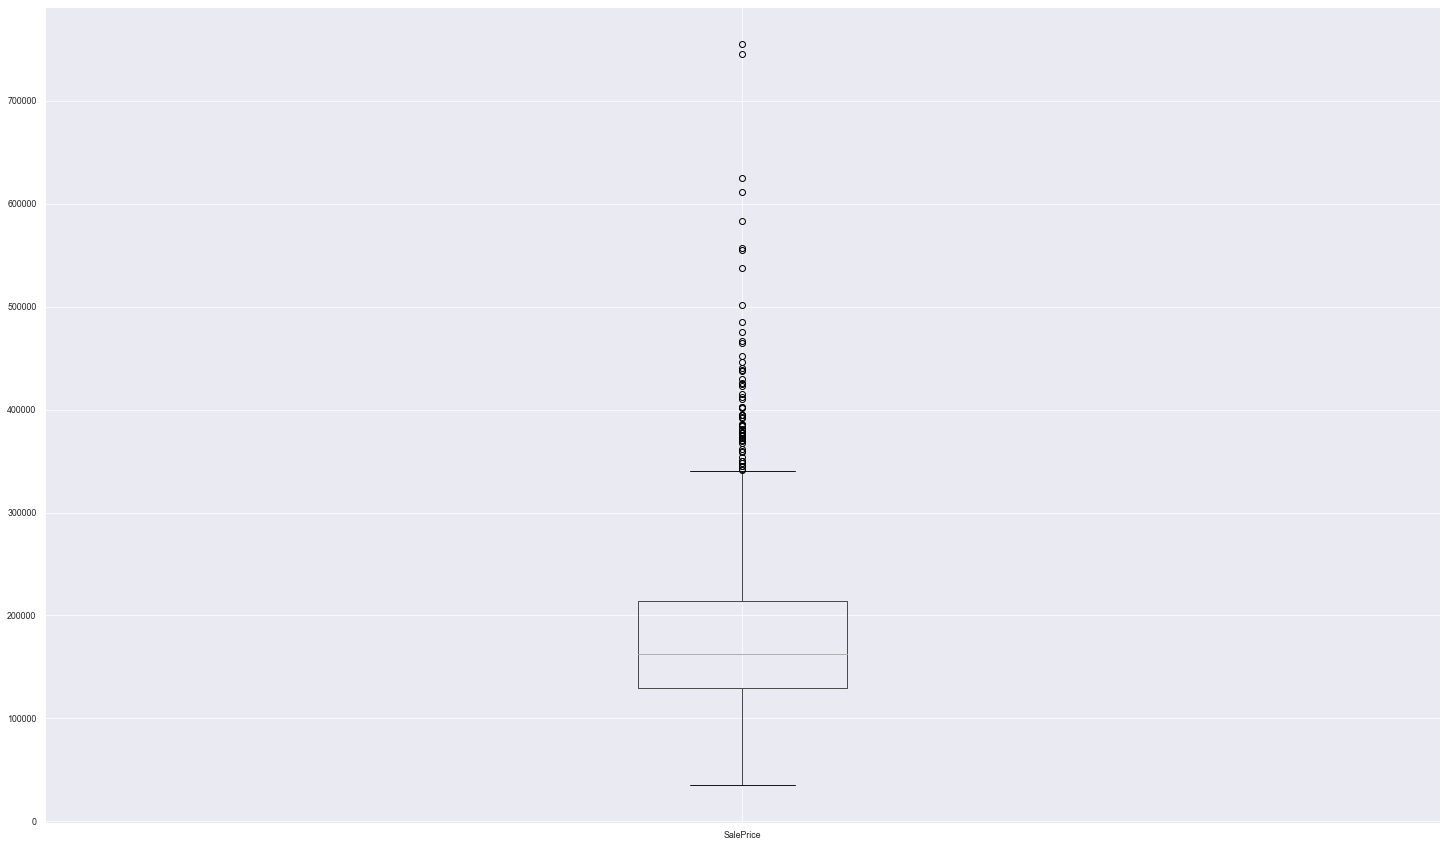

In [217]:
# Vemos si existen datos atipicos
houses.boxplot(column='SalePrice')
plt.show()

In [218]:
# Para descartar casos atípicos de acuerdo al criterio del rango intercuartil primero calculamos el IQR y los whiskers superior e inferior
describe = houses.describe().T
describe['IQR'] = describe['75%'] - describe['25%']
describe['Upper_W'] = describe['75%']  + 1.5 * describe['IQR']
describe['Lower_W'] = describe['25%']  - 1.5 * describe['IQR']

# Valida la salida para la columna de precio de venta y asigna los resultados en variables
describe.loc['SalePrice',:]
Upper_W = describe.loc['SalePrice','Upper_W']
Lower_W = describe.loc['SalePrice','Lower_W']

In [219]:
# Luego, se filtra el dataset para quedarnos con los datos que estén dentro de los límites
houses = houses[(houses['SalePrice'] >= Lower_W)&(houses['SalePrice'] <= Upper_W)]
houses.shape

(1398, 76)

Relaciones entre el precio de venta y otras caracteristicas

In [223]:
# Hasta ahora con todo lo que se ha revisado, podríamos eliminar las siguientes caracteristicas qeu no aportan mucho más.
eliminar = ['MSSubClass','Street','LotShape','OverallQual','RoofMatl','BsmtQual','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
            'BsmtUnfSF','HeatingQC','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','FireplaceQu','GarageYrBlt','GarageFinish','GarageArea',
            'GarageQual','GarageCond']

houses = houses.drop(eliminar,axis=1)
houses.head()

,MSZoning,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,RL,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,RL,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,RL,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


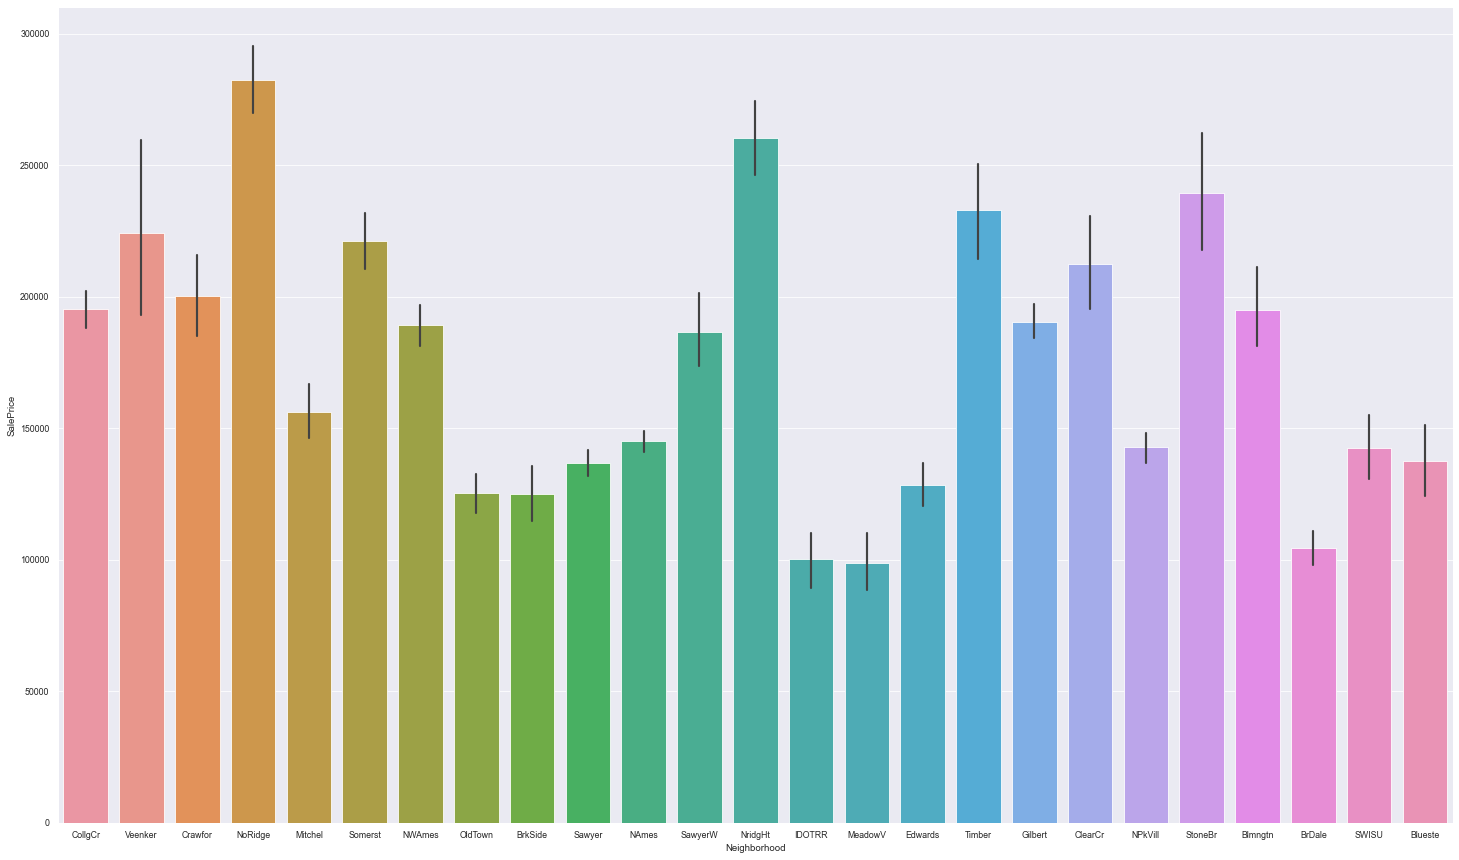

In [224]:
# Asigna formato y tamaño de gráfica 
sns.set(context = 'paper', style = 'darkgrid', rc={'figure.figsize':(25, 15)})

# Genera una gráfica de barras para observar el promedio de precio de venta por vecindario
sns.barplot(x = houses['Neighborhood'],y = houses['SalePrice']); 

Revisión de correlaciones con variables númericas

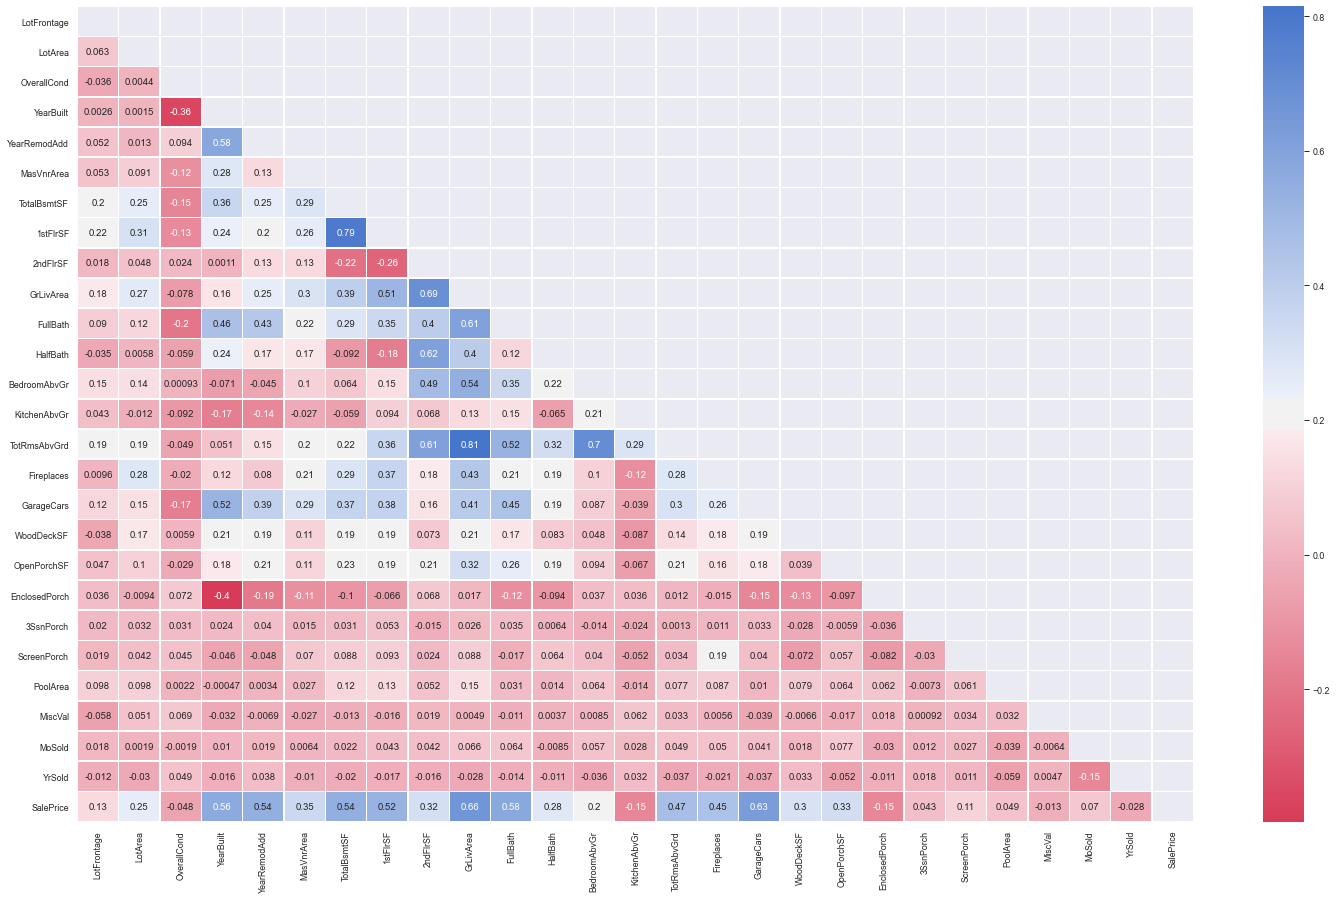

In [225]:
# Asigna formato y tamaño de gráfica 
sns.set(context = 'paper', style = 'darkgrid', rc={'figure.figsize':(25, 15)})

#Quita la esquina superior del Heatmap
#Zero_like convierte los valores de la matriz de correlación en ceros y el dtype los convierte a booleanos
mask = np.zeros_like(houses.corr(),dtype=np.bool)
#triu_indices_from regresa los valores del triangulo superior de la matriz
mask[np.triu_indices_from(mask)] = True
#asignar paleta de colores (colores HUSL)
cmap = sns.diverging_palette(6,255, as_cmap =  True)

sns.heatmap(houses.corr(),mask = mask, cmap = cmap, linewidths=0.5,annot= True);

PCA
para seguir con el análisis y dado que tenemos múltiples columnas, comenzamos por reducirlas

In [230]:
# Tomando en cuenta sólo variables númericas
houses_num = houses._get_numeric_data()
houses_num.head()

,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,5,2003,2003,196.0,856,856,854,1710,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,8,1976,1976,0.0,1262,1262,0,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,5,2001,2002,162.0,920,920,866,1786,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,5,1915,1970,0.0,756,961,756,1717,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,5,2000,2000,350.0,1145,1145,1053,2198,...,192,84,0,0,0,0,0,12,2008,250000


In [231]:
#Estandarización de datos
scaler = StandardScaler()
norm_houses = scaler.fit_transform(houses_num)

In [232]:
# Creación de un dataframe estandarizado
df = pd.DataFrame(norm_houses, index = houses_num.index, columns = houses_num.columns)

In [233]:
# Genera PCA
pca = PCA()
pca.fit(df)

PCA()

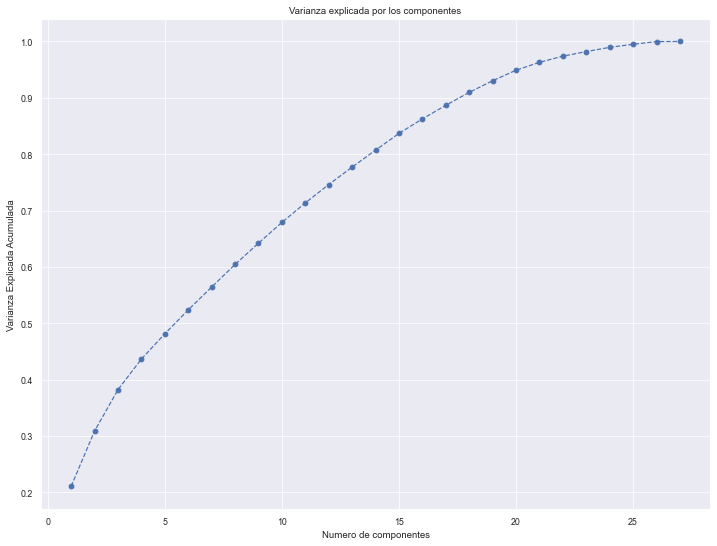

In [235]:
plt.figure(figsize=(12,9), facecolor='w')
plt.plot(range(1,28), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--")
plt.title("Varianza explicada por los componentes")
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada Acumulada"); #Regla de oro es quedarnos con el 80% de la varianza